# Data exploration American automobile data
# Day 1 : 02/25/2019
source: https://github.com/StephenElston/ExploringDataWithPython/blob/master/.ipynb_checkpoints/LearningDataVisualization-checkpoint.ipynb


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
names=['symboling','normalized-losses','make', 'fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto_price=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
auto_price.columns=names
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [52]:
# removing data with ? Identify the columns having ? marks
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for column in cols:
    auto_price.loc[auto_price[column] == '?', column] = np.nan



C:\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [53]:
## Convert some columns to numeric values
for column in cols:
    auto_price[column] = pd.to_numeric(auto_price[column])

In [54]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


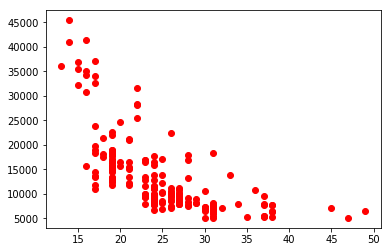

In [56]:
# create a scatter plot
plt.plot(auto_price['city-mpg'],auto_price['price'],'ro')

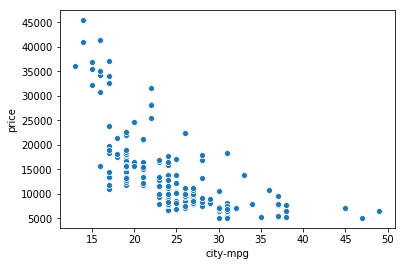

In [57]:
sns.scatterplot(x=auto_price['city-mpg'],y=auto_price['price'])

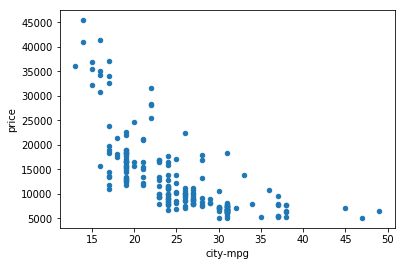

In [59]:
auto_price.plot(kind = 'scatter', x = 'city-mpg', y = 'price')

Text(0,0.5,'Auto_price')

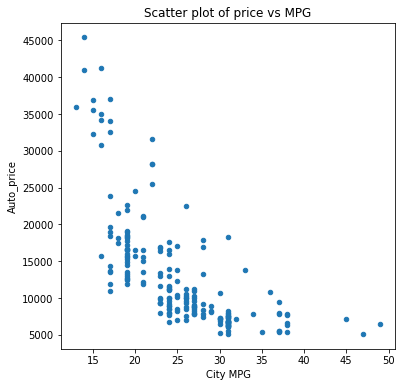

In [64]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca() # define axis
auto_price.plot(kind='scatter',x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot of price vs MPG')
ax.set_xlabel('City MPG')
ax.set_ylabel('Auto_price')

In [72]:
# create line plot
import pandas as pd
x=list(range(100))
y=[z *z  for z in range (100)]
df=pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


Text(0,0.5,'x^2')

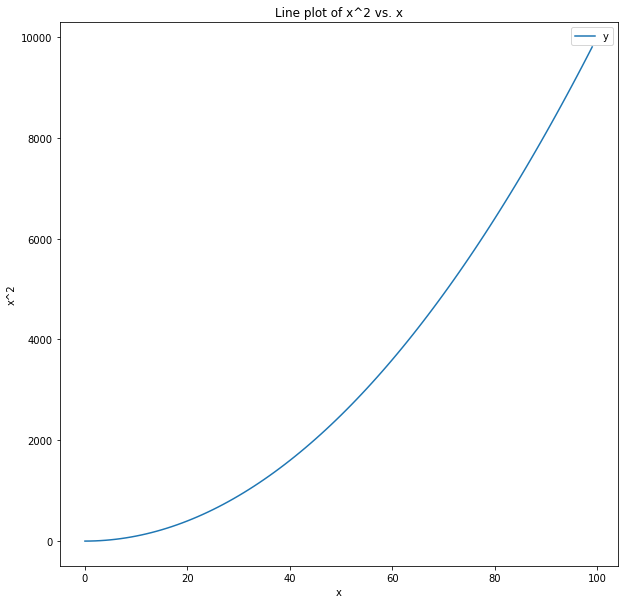

In [73]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(x = 'x', y = 'y', ax = ax) ## line is the default plot type
ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('x') # Set text for the x axis
ax.set_ylabel('x^2')# Set text for y axis

In [75]:
# create bar plot
counts=auto_price['make'].value_counts()
counts

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

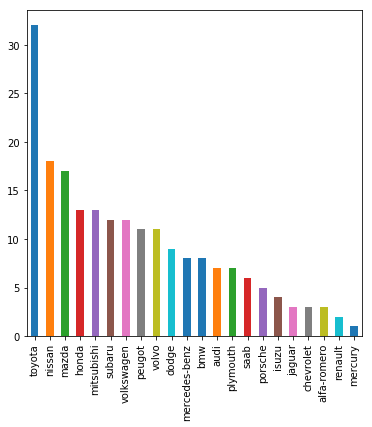

In [76]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
counts.plot(kind='bar',ax=ax)

Text(0,0.5,'Number of autos')

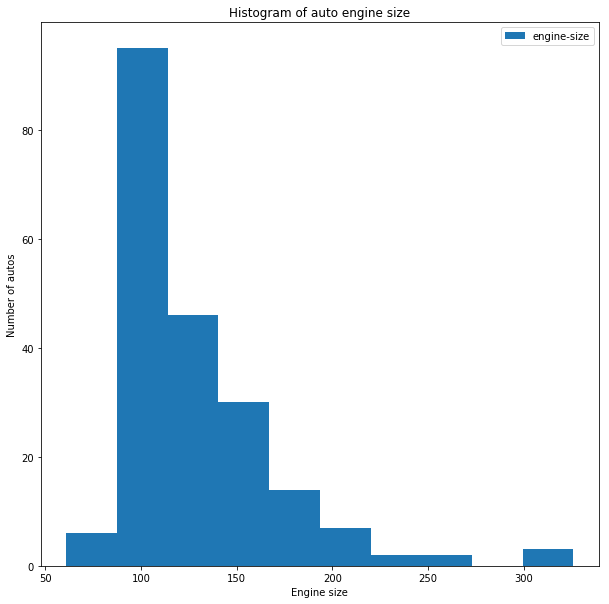

In [79]:
# histogram plot
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_price.plot(kind='hist',y='engine-size',ax=ax)
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

(array([1]), <a list of 1 Text xticklabel objects>)

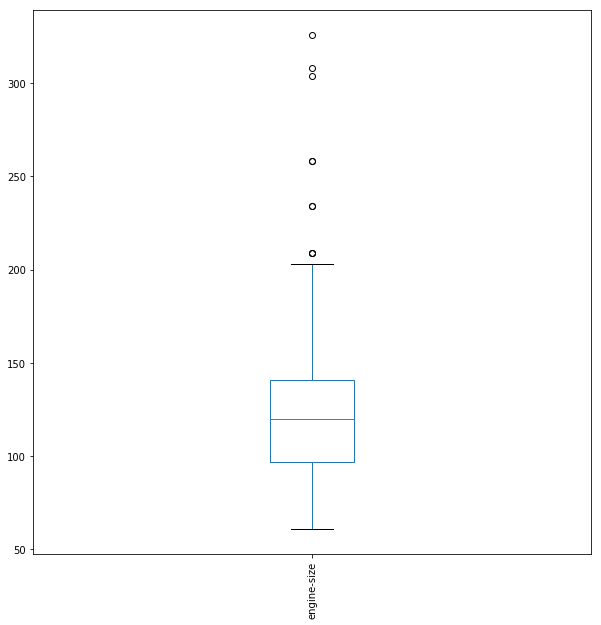

In [101]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_price[['engine-size','fuel-type']].plot(kind='box',by='body', ax = ax) 
plt.xticks(rotation=90)

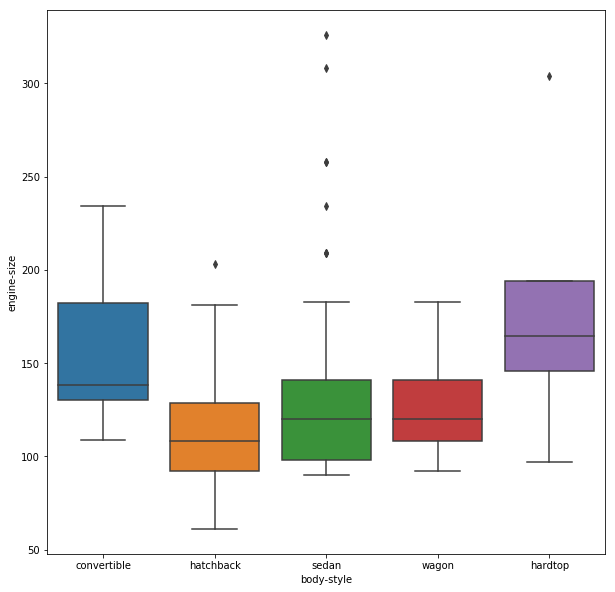

In [106]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(y=auto_price['engine-size'],x=auto_price['body-style'])

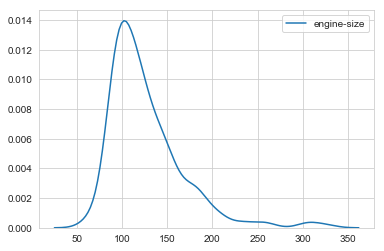

In [109]:
sns.set_style("whitegrid")
sns.kdeplot(auto_price['engine-size'])

Text(0,0.5,'Density')

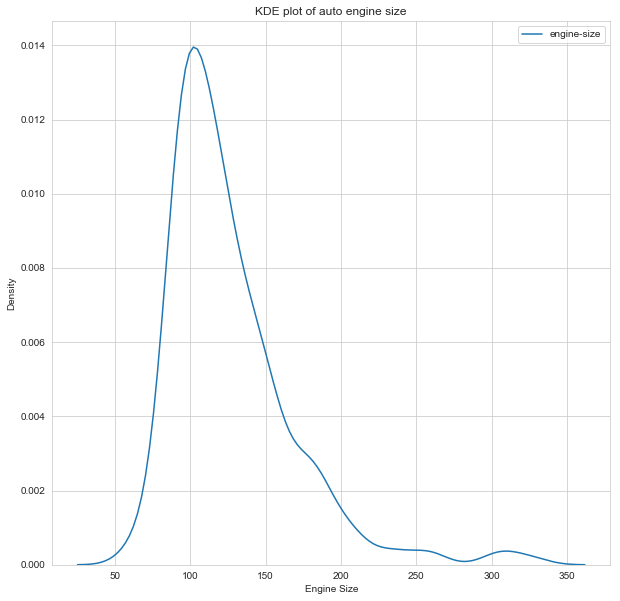

In [112]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_price['engine-size'], ax = ax)
ax.set_title('KDE plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

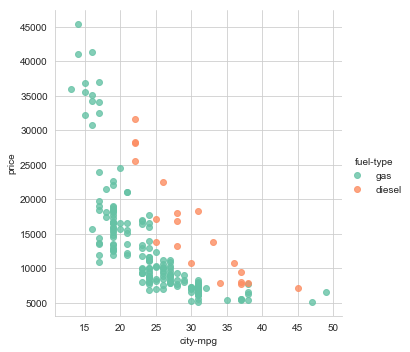

In [126]:
sns.lmplot(x = 'city-mpg', y = 'price', 
           data = auto_price, 
           hue = "fuel-type", 
           palette="Set2", fit_reg = False)

'Done'

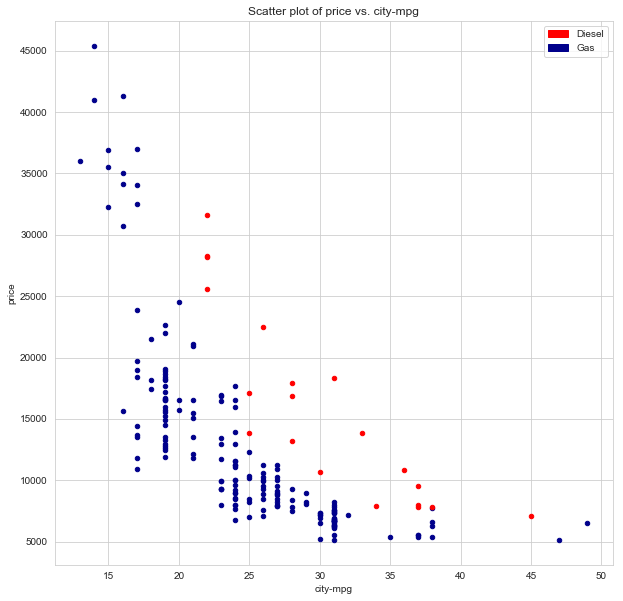

In [160]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_price, ['city-mpg'])

['city-mpg']

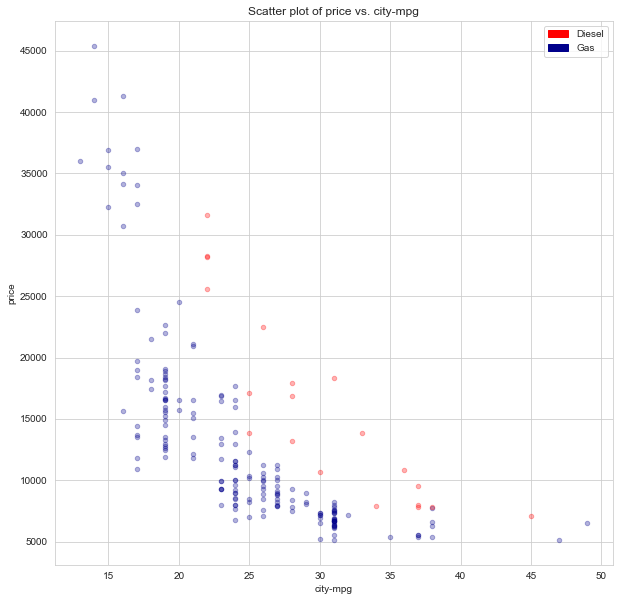

In [161]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha = 0.3) 
        ax.set_title('Scatter plot of price vs. ' + col)
        red_patch = mpatches.Patch(color='Red', label='Diesel')   
        blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
        plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_price, ['city-mpg'])

Text(0,0.5,'Engine size')

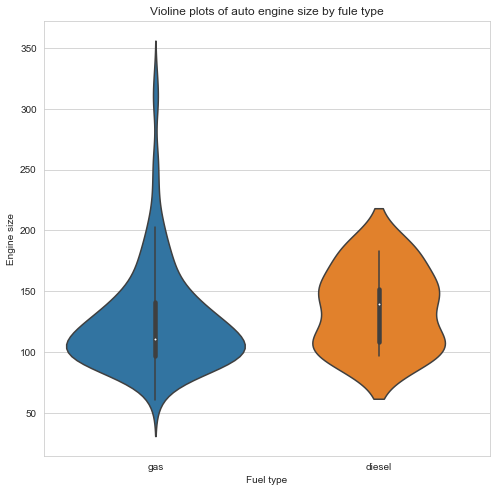

In [122]:
# violin plot
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_price, ax = ax)
ax.set_title('Violine plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

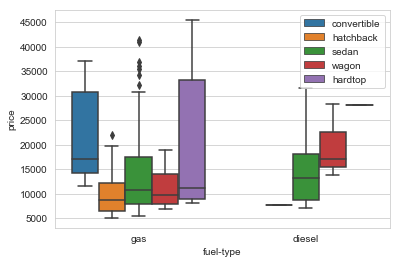

In [142]:
sns.set_style("whitegrid")
sns.boxplot(data = auto_price, x = 'fuel-type', y = 'price', hue="body-style")
plt.legend(loc='upper right')

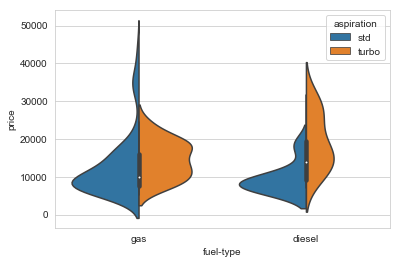

In [144]:
sns.violinplot(data = auto_price, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

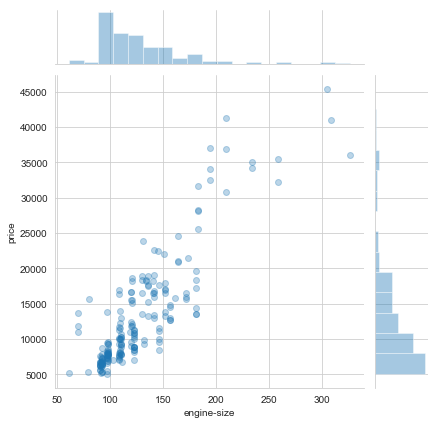

In [145]:

sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_price, alpha = 0.3)

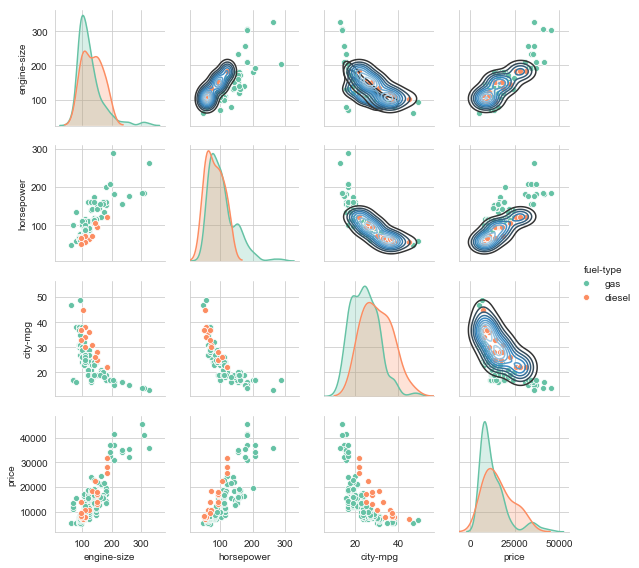

In [152]:
num_cols = [ "engine-size", "horsepower", "city-mpg", "price",'fuel-type'] 
sns.pairplot(auto_price[num_cols], hue='fuel-type', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d");

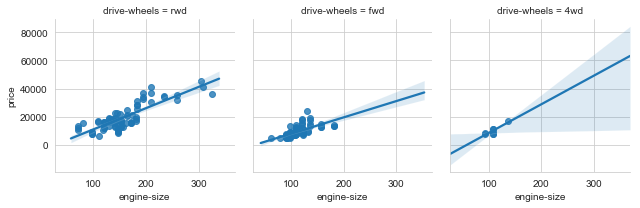

In [155]:
# multi axes faacet plot
g=sns.FacetGrid(data=auto_price,col='drive-wheels')
g.map(sns.regplot,'engine-size','price',fit_reg=True)

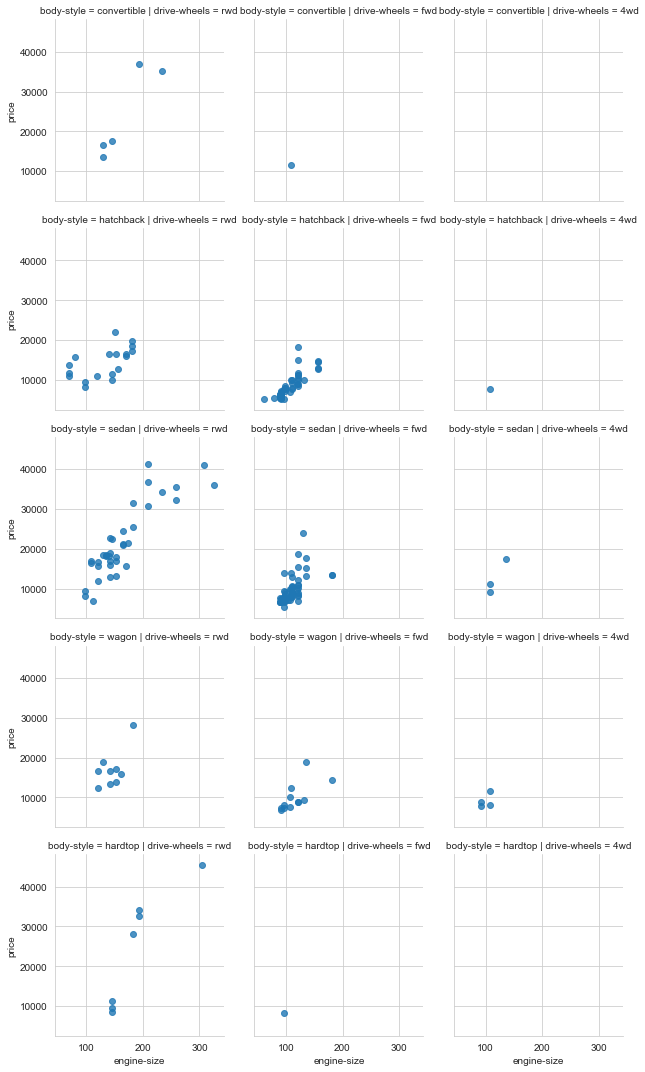

In [156]:
g = sns.FacetGrid(auto_price, col="drive-wheels", row = 'body-style')
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

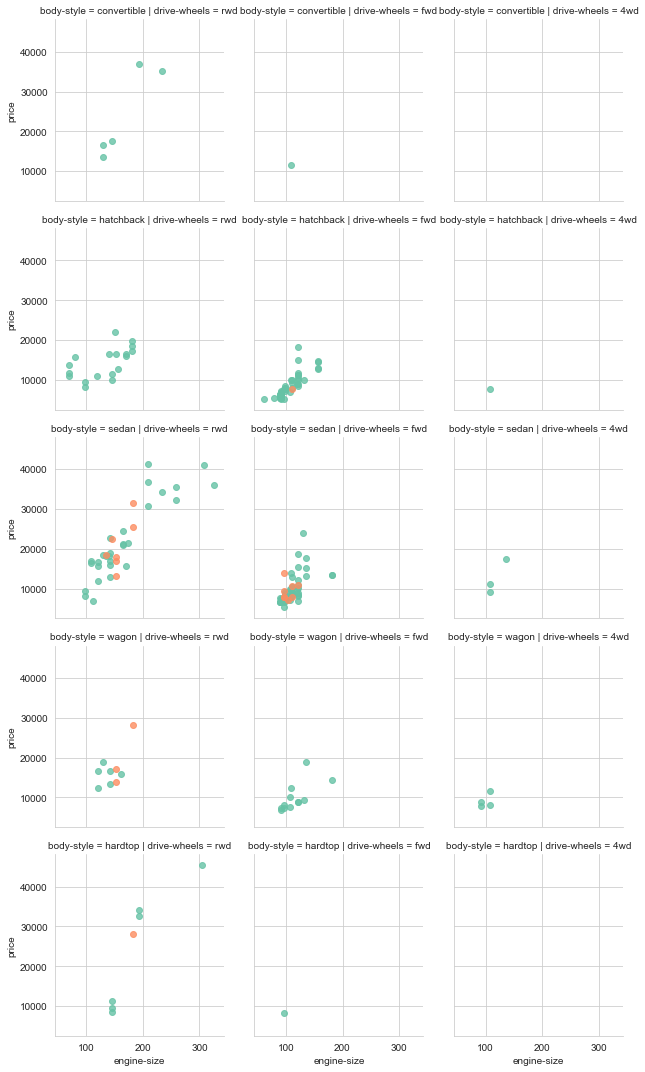

In [159]:
g = sns.FacetGrid(auto_price, col="drive-wheels", 
                  row = 'body-style', hue = 'fuel-type',  
                  palette="Set2")
g.map(sns.regplot, 'engine-size', 'price', fit_reg = False)